# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></div><div class="lev1 toc-item"><a href="#ipynb-files" data-toc-modified-id="ipynb-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>ipynb</code> files</a></div><div class="lev1 toc-item"><a href="#Testing-nbformat-on-one-Notebook" data-toc-modified-id="Testing-nbformat-on-one-Notebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Testing <code>nbformat</code> on one Notebook</a></div><div class="lev2 toc-item"><a href="#Reading-in-a-notebook" data-toc-modified-id="Reading-in-a-notebook-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reading in a notebook</a></div><div class="lev2 toc-item"><a href="#Cell-information" data-toc-modified-id="Cell-information-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cell information</a></div><div class="lev2 toc-item"><a href="#Text-Information" data-toc-modified-id="Text-Information-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Text Information</a></div><div class="lev2 toc-item"><a href="#Image-information" data-toc-modified-id="Image-information-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Image information</a></div><div class="lev1 toc-item"><a href="#Looping-over-notebooks" data-toc-modified-id="Looping-over-notebooks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Looping over notebooks</a></div>

# Objective
This notebook is a tutorial that explain how to pull and display text and image information from other notebooks.

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import glob

# `ipynb` files

In [49]:
#======= Update Me =======
# Locationj of the notebooks
dir_notebookes = "/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/"
file_prefix = "my_notebook"
#=========================
print dir_notebookes

/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/


In [50]:
# Caliling the Notegbooks
list_file_notebook = glob.glob("{}{}*.ipynb".format(dir_notebookes, file_prefix))
list_file_notebook = sorted(list_file_notebook)
print "Number of notebooks: {}".format(len(list_file_notebook))
list_file_notebook

Number of notebooks: 31


['/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_AK.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_AR.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_AZ.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_CO.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_CT.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_DC.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_DE.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_FL.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_IA.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_ID.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_KS.ipynb',
 '/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_KY.ipynb',
 '/home/eyalk/pr

# Testing `nbformat` on one Notebook

In [51]:
import nbformat

## Reading in a notebook
`notebook_version` dictates the formatting. We set it to version 4 to be compatible with the functions below.  
One could alternatively set to other values (1, 2, 3) or leave as is with `notebook_version = nbformat.NO_CONVERT`.   
That said, some slight modification of the below might be required. See JSON format renaming with the different versions  [here](http://nbformat.readthedocs.io/en/latest/format_description.html?highlight=execution_count).

In [52]:
notebook_version = 4

**Reading**

In [53]:
print list_file_notebook[0]
notebook_temp = nbformat.read(list_file_notebook[0], notebook_version)

/home/eyalk/projects/blog/runipy/notebooks/notebook_runs/my_notebook_AK.ipynb


**Exploring**

In [54]:
print "type: {}".format(type(notebook_temp))
print "keys: {}".format(notebook_temp.keys())
print "Chosen format: {}".format(notebook_temp["nbformat"])

type: <class 'nbformat.v3.nbbase.NotebookNode'>
keys: [u'nbformat', u'metadata', 'cells', u'nbformat_minor']
Chosen format: 4


In [55]:
for key in notebook_temp["metadata"].keys():
    print key
    print notebook_temp["metadata"][key]
    print "--------"

kernelspec
{u'display_name': u'Python 2', u'name': u'python2', u'language': u'python'}
--------
nav_menu
{}
--------
language_info
{u'mimetype': u'text/x-python', u'nbconvert_exporter': u'python', u'name': u'python', u'file_extension': u'.py', u'version': u'2.7.6', u'pygments_lexer': u'ipython2', u'codemirror_mode': {u'version': 2, u'name': u'ipython'}}
--------
orig_nbformat
3
--------
toc
{u'toc_window_display': False, u'toc_section_display': u'block', u'navigate_menu': True, u'threshold': 6, u'number_sections': True, u'sideBar': True, u'toc_cell': True}
--------


## Cell information
To pull information from a cell, one is required to define: 
  * Which `out_value` is of interest?
  * What is the format of the cell: text or image?    
  
By `out_value` we are referring to the numerical value in the square brackets in a notebook on the left side where is says "Out[`out_value`]:".

In [56]:
def select_cell(notebook, out_value):
    """
    returns the information of a cell
    """
    
    # Notebook formatting defintions
    if notebook["nbformat"] < 4:
        cell_all = list(notebook["worksheets"][0]["cells"])
        key_counter = 'prompt_number'
    else:
        cell_all = list(notebook["cells"])
        key_counter = 'execution_count'
    
    # Finding and returning the relevant cell
    for icell, cell in enumerate(cell_all):
        try: # Not all Cells have the `key_counts`
            if cell[key_counter] == out_value:
                return cell
        except:
            None
            
    return None

#def cell_to_result(cell):
#    return long(cell["outputs"][0]["text"].split(":")[0])

* The `if notebook["nbformat"] < 4` condition verifies that the cell yields the correct dictionary formatting
* The `for icell, cell in enumerate(cell_all):` loop searches for the relevant cell and return it once it is found.

**Calling Cell Information**

In [57]:
outvalue = 6
cell_temp = select_cell(notebook_temp, outvalue)

**Exploratory**

In [58]:
print "type: {}".format(type(cell_temp))
print "keys: {}".format(cell_temp.keys())
print "cell type {}".format(cell_temp["cell_type"])
print "Number of outputs: {}".format(len(cell_temp["outputs"]))

print "\nMetadata:"
for key in cell_temp["metadata"].keys():
    print key
    print cell_temp["metadata"][key]
    print "--------"

type: <class 'nbformat.v3.nbbase.NotebookNode'>
keys: [u'cell_type', 'execution_count', u'outputs', 'source', u'metadata']
cell type code
Number of outputs: 1

Metadata:
ExecuteTime
{u'start_time': u'2016-09-19T18:00:43.137267', u'end_time': u'2016-09-19T18:00:43.141048'}
--------
collapsed
False
--------


## Text Information
Extracting text information is highly specific on the output.  
As an example, here we give a **very specifc** function to convert the diplayed pandas DataFrame.  
Unfortunately, when the DataFrame is not shown in full in the notebook, this specific example is not too useful. I.e our DataFrame has over 150 entries, but as you will see only 60 were displayed in the notebook. 

In [82]:
outvalue = 5
cell_temp = select_cell(notebook_temp, outvalue)

In [83]:
def cell_text(cell, item_value):
    return cell["outputs"][item_value]["data"]["text/plain"]

def cell2df(cell, item_value=1):
    """
    !!!
    This code is very specific for our use case.
    Any change in `my_notebook.ipynb` would break this
    !!!
    
    Find the text information in the cell (which we know to be a DataFrame) and convets to a pandas DataFrame
    """
    list_results = cell_text(cell, item_value).split("\n")
    
    df_ = pd.DataFrame()

    for index, item in enumerate(list_results, ):
        if 0 == index:
            columns = list_results[0].split()
        elif (index < (len(list_results) - 2) ):
            df_temp = pd.DataFrame(pd.Series(list_results[index].split()[1:], index=columns)).T
            df_ = df_.append(df_temp, ignore_index=True)
    return df_            

**Note!** This datafram is only 61 entires in length, where the original is over 150.  
Notice the `"..."` values in entry number 30, indicating that one pulls, as expected, only data that is dispalyed. (The full dataframe is not stored in the notebook)

In [84]:
df_dispalyed_text = cell2df(cell_temp, item_value=1)
print df_dispalyed_text.shape
df_dispalyed_text.head(4)

(61, 3)


,iso_calendar_week,party,count
0,22,Republican,129
1,45,Republican,5444
2,34,Republican,3200
3,33,Republican,2076


In [85]:
df_dispalyed_text.loc[29]

iso_calendar_week              19
party                Non-Partisan
count                         130
Name: 29, dtype: object

In [86]:
df_dispalyed_text.loc[30]

iso_calendar_week    ...
party                ...
count                ...
Name: 30, dtype: object

In [87]:
df_dispalyed_text.loc[31]

iso_calendar_week               7
party                Non-Partisan
count                          26
Name: 31, dtype: object

## Image information
Here we call in the a cell containing an image.  
In our case, we are calling  
output value `outvalue = 6`  
and   
`cell["outputs"]` list item number `out_item_val = 0`.  
These values, of course, will change from each instance.

In [92]:
def cell_to_image(cell, item_value=1):
    # For notebook["nbformat"] >=4
    if "execution_count" in cell.keys():
        return cell["outputs"][item_value]['data']['image/png']
    # For notebook["nbformat"] < 4
    elif "prompt_number" in cell.keys(): # i.e version < 4
        return cell["outputs"][item_value]['png']
    # In case we missed anything, or changes in the future
    return None

In [93]:
outvalue = 6
cell_temp = select_cell(notebook_temp, outvalue)

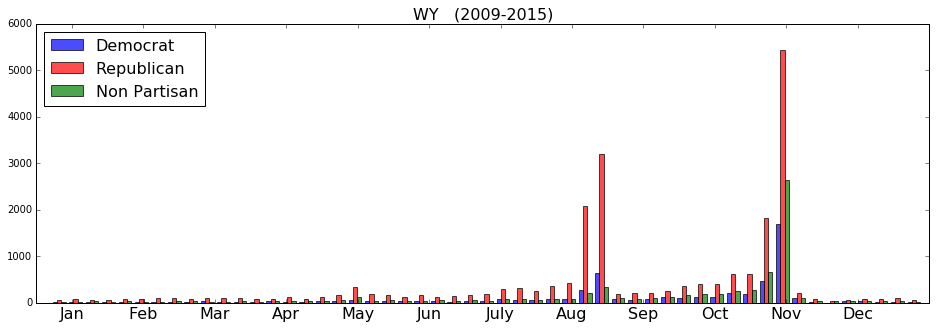

In [94]:
from IPython.display import Image, display

out_item_val = 0
str_image = cell_to_image(cell_temp, item_value = out_item_val)
Image(str_image)

This, of course could be looped over according to need.

# Looping over notebooks
Here we preform the same tasks on various notebooks

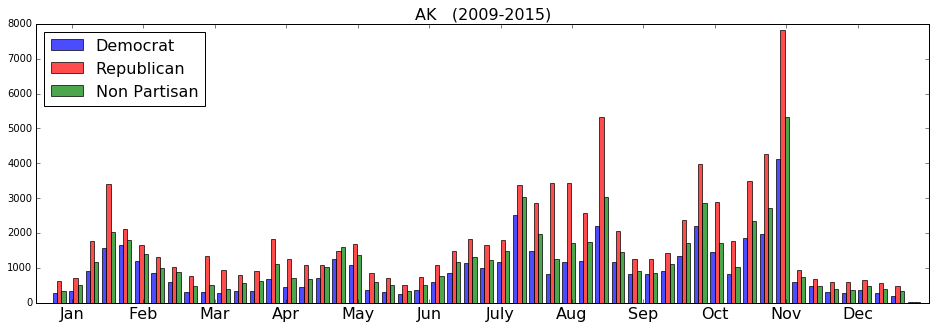

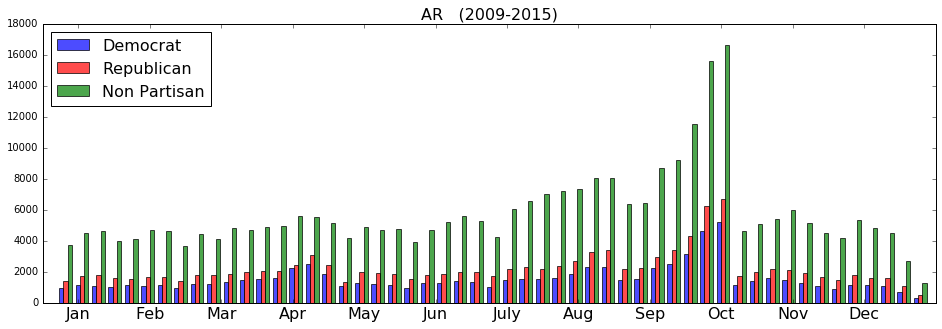

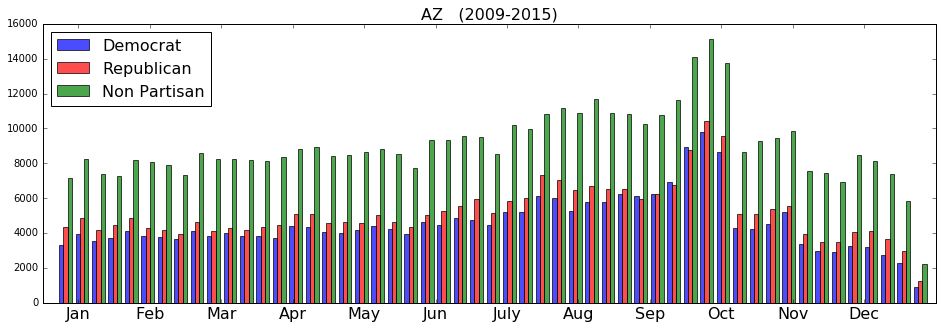

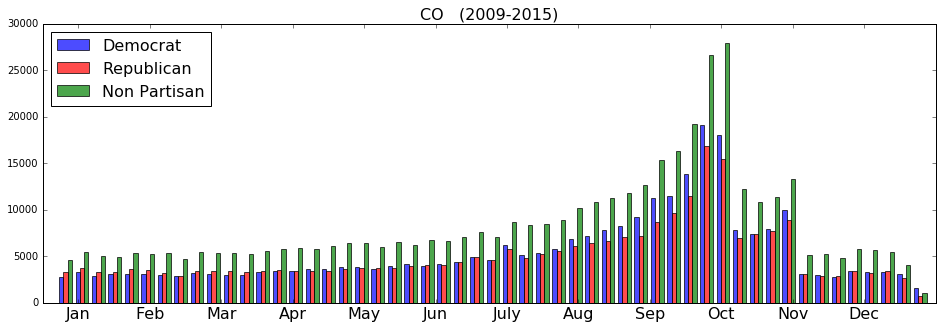

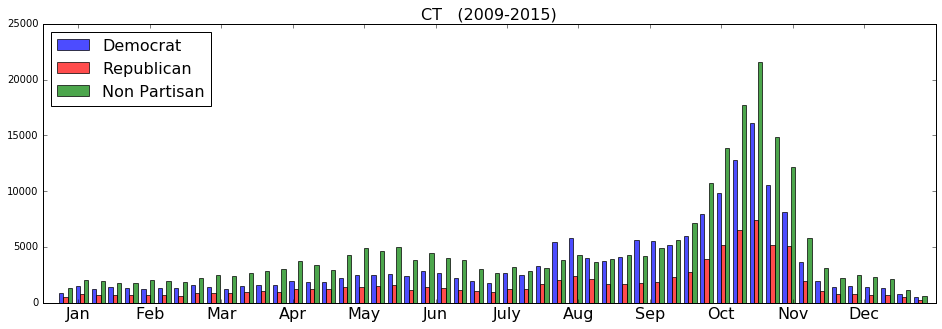

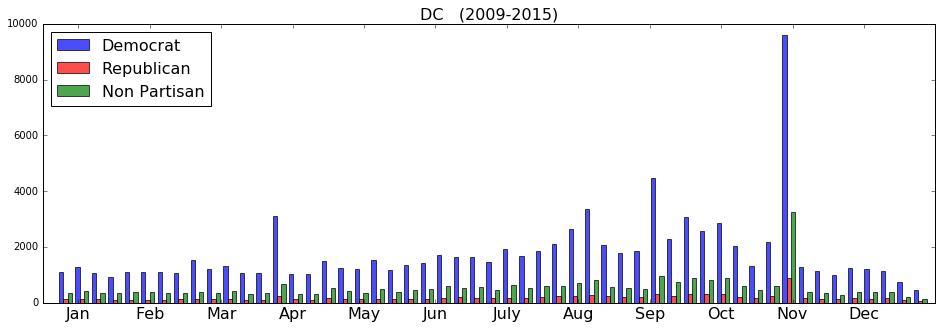

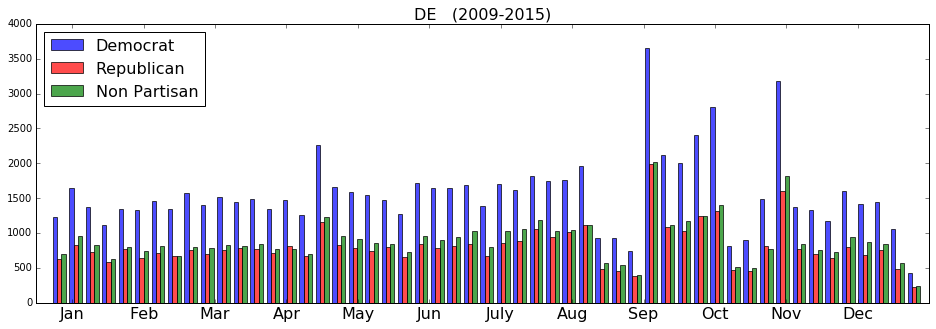

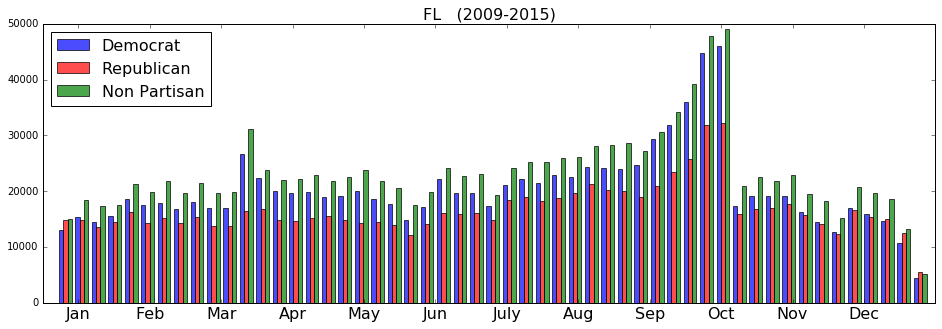

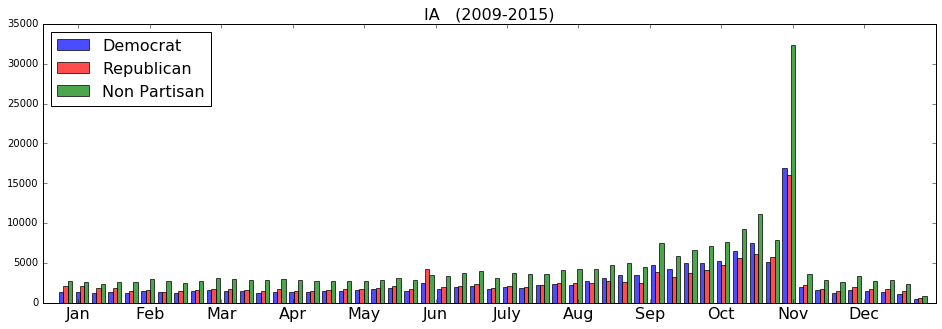

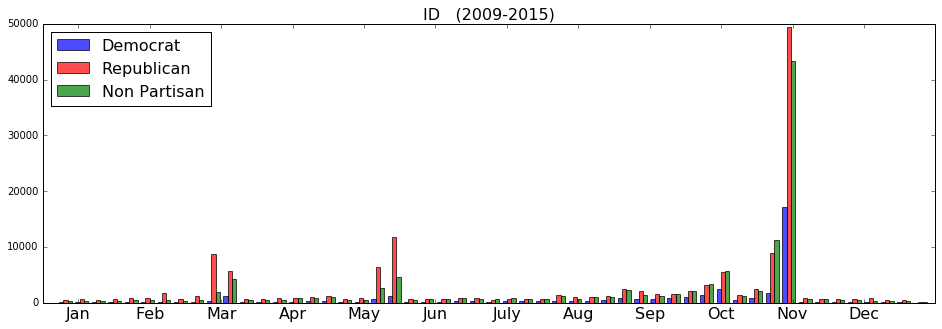

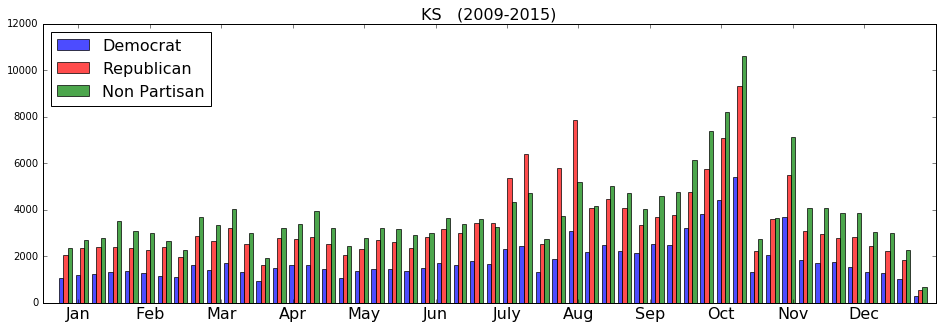

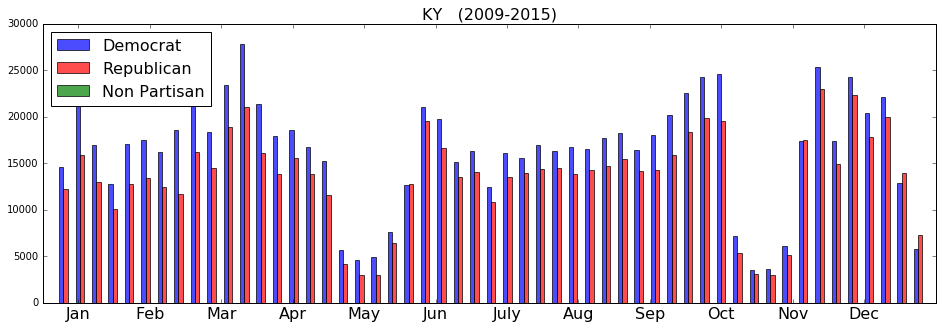

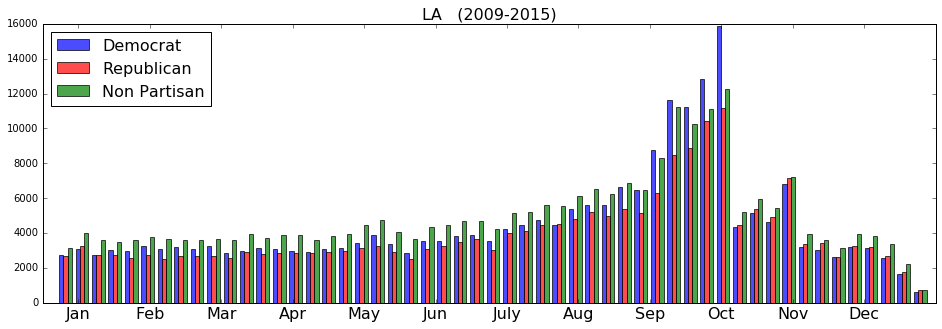

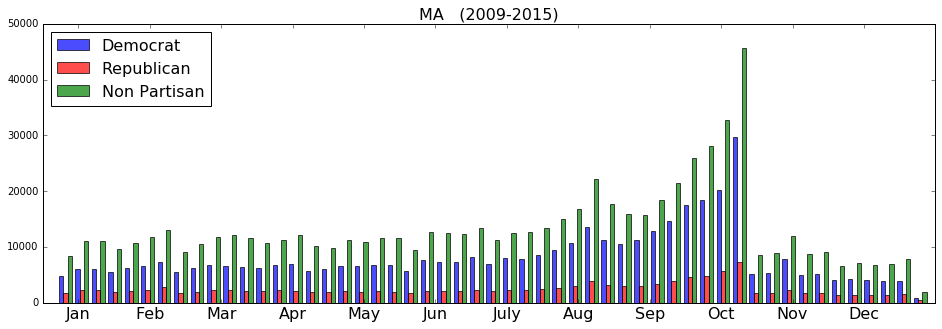

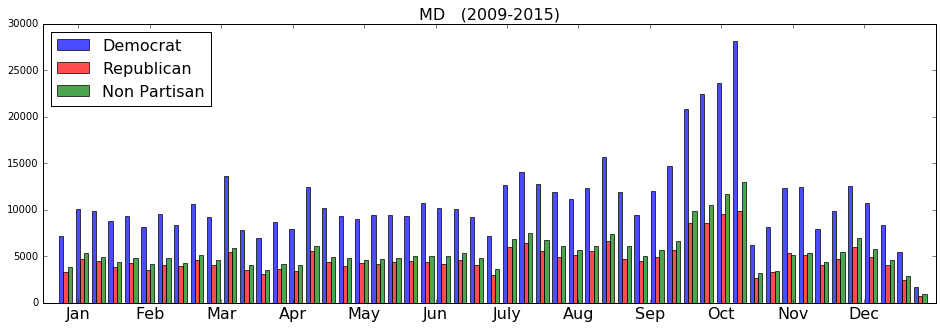

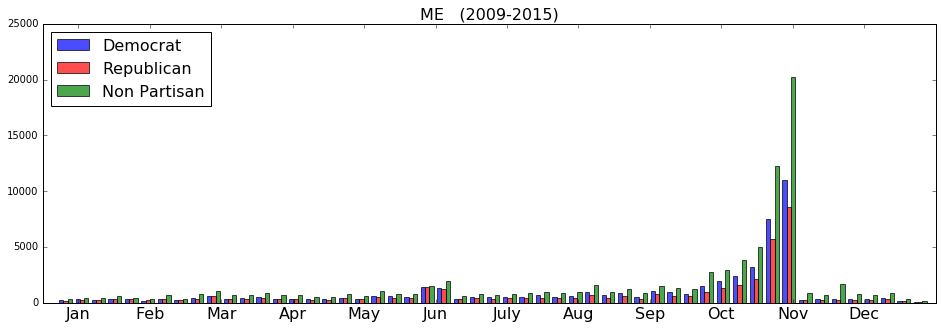

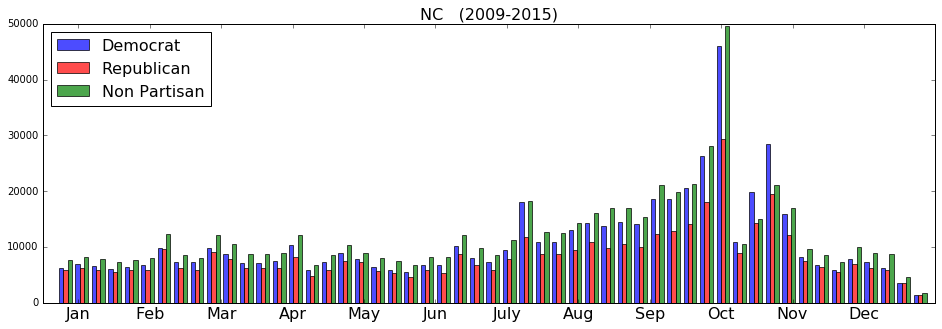

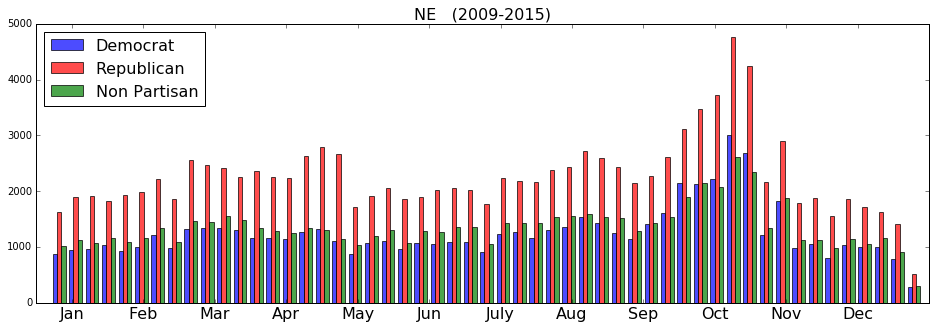

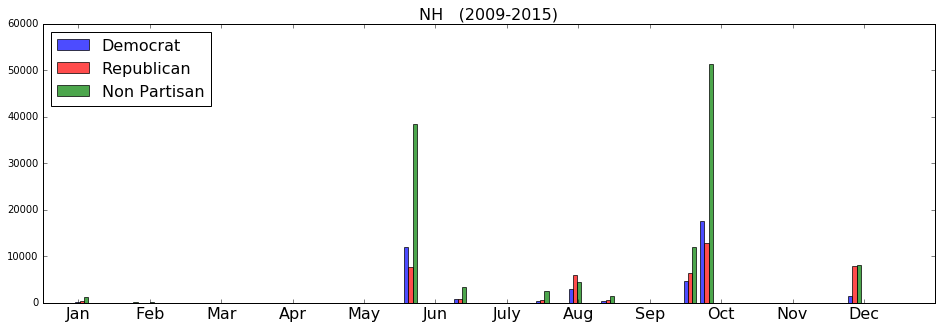

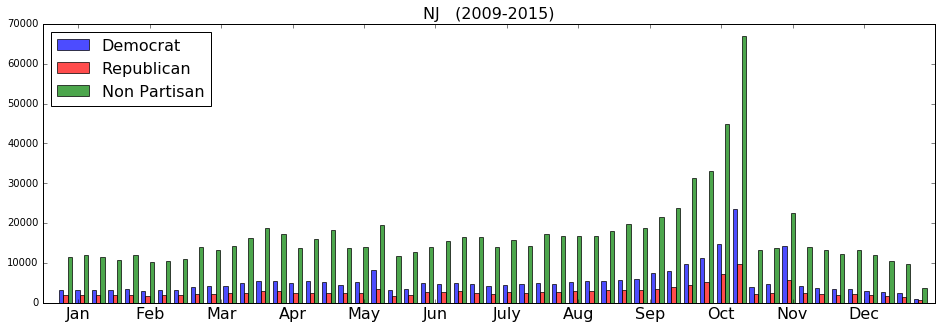

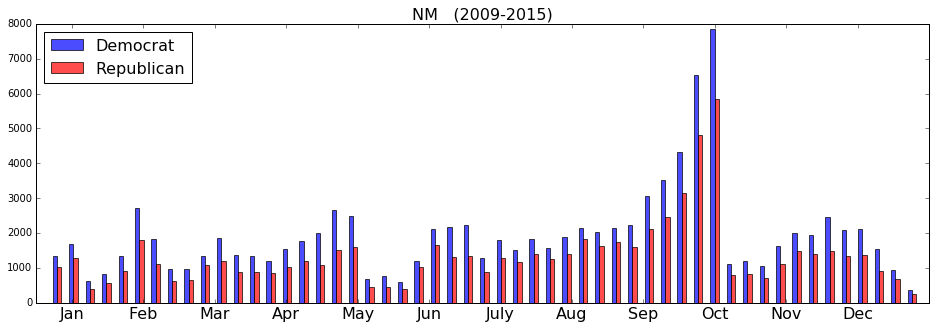

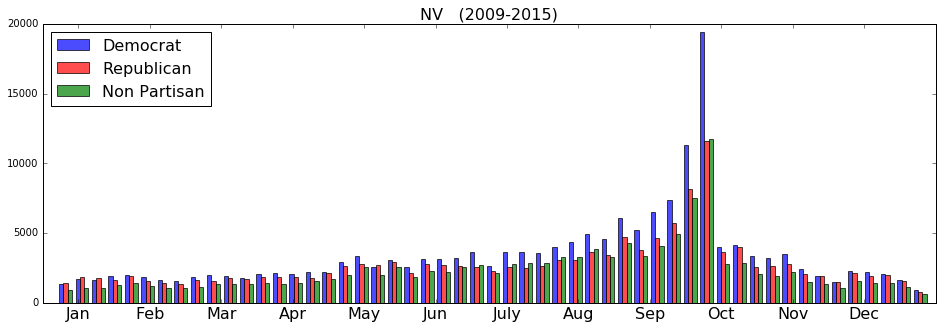

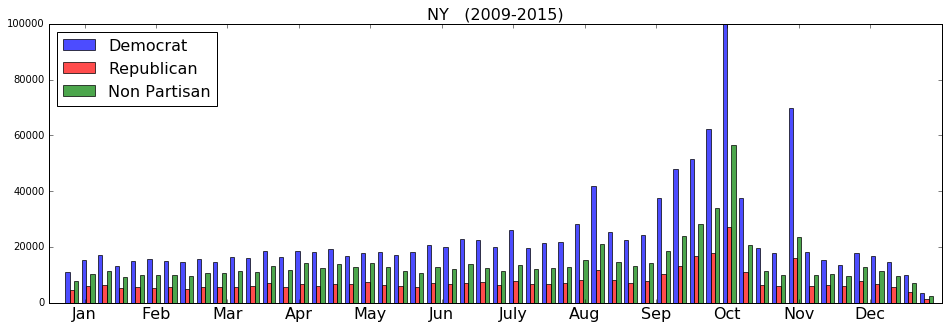

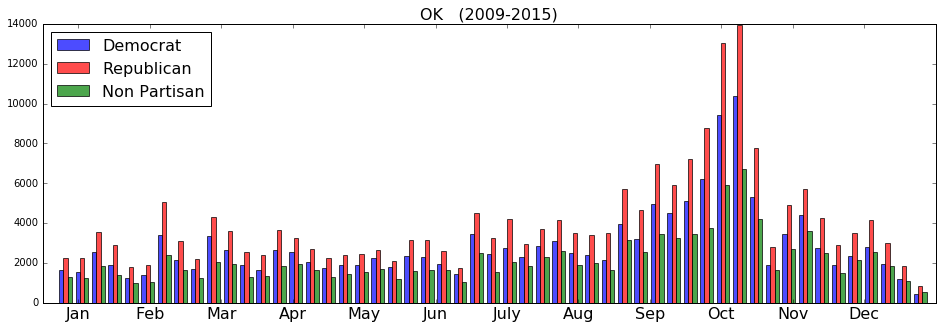

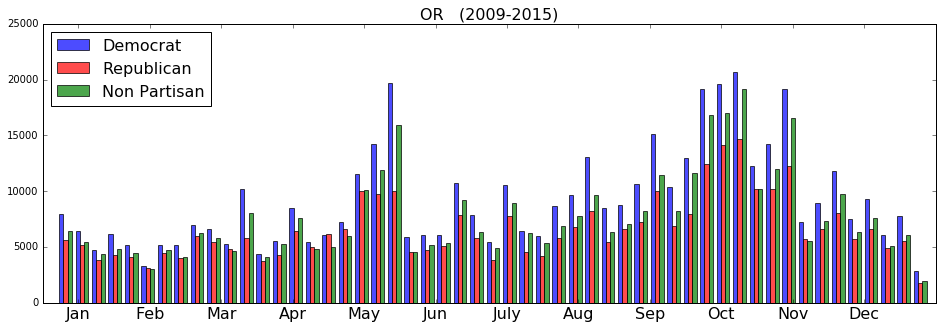

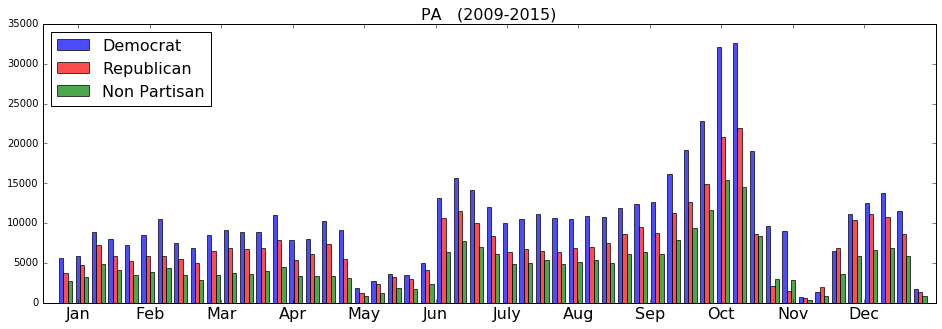

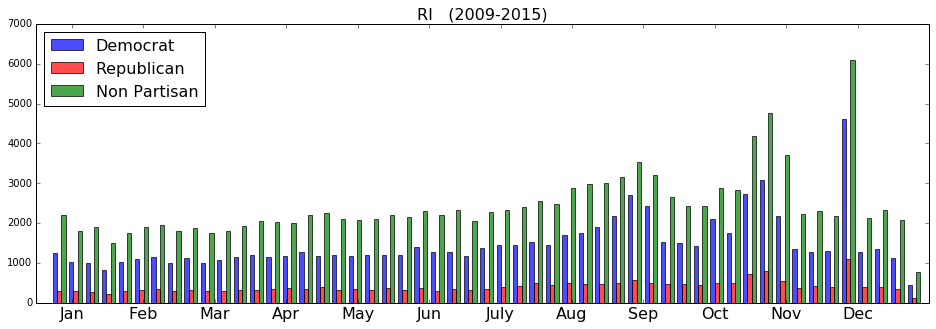

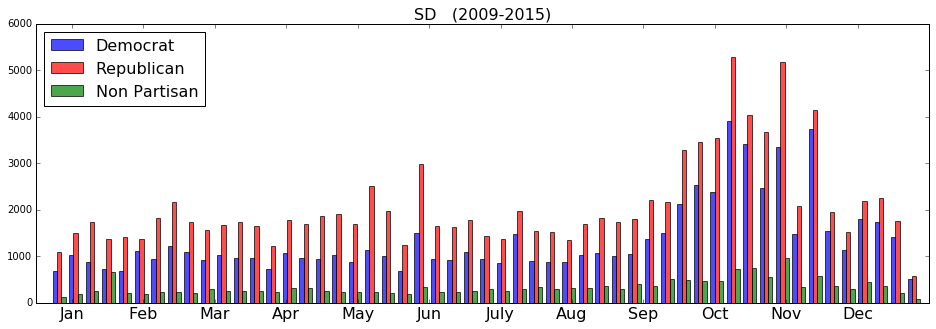

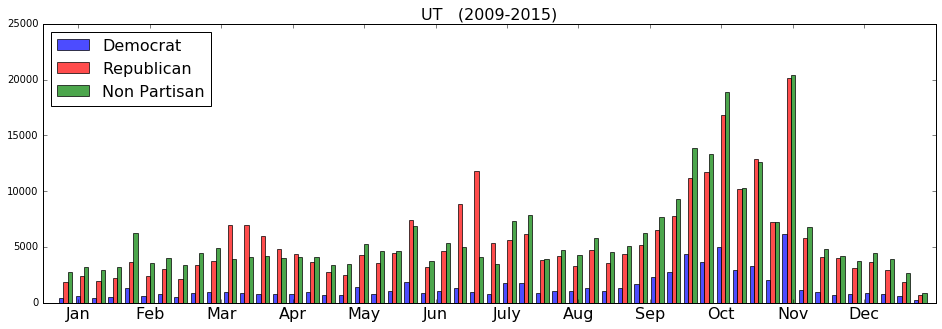

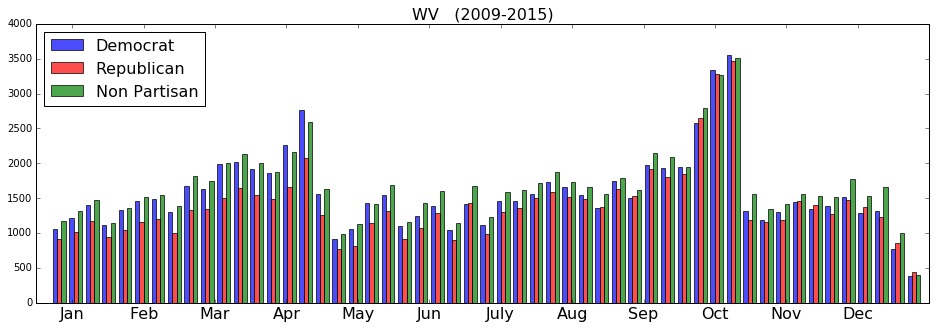

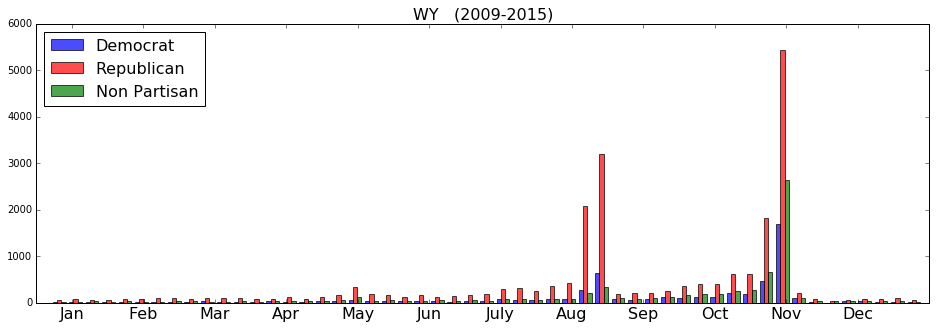

In [95]:
notebook_version = 4
outvalue = 6
out_item_val = 0

for ifile, file_temp in enumerate(list_file_notebook):
    # Reading in Notebook
    notebook_temp = nbformat.read(file_temp, notebook_version)
    
    # Finding Cell of `out_value`
    cell_temp = select_cell(notebook_temp, outvalue)
    
    # Extracting string information from the cell
    str_image = cell_to_image(cell_temp, item_value = out_item_val)
    
    # Displaying the image
    display(Image(str_image))
